# Исследовательский анализ данных на Python

## Описание

К вашему вниманию датасет цен на авто (car price). Данные взяты из интернета чисто для исследования и практики дата анализа, в датасете не уточняется из какого региона и по какой валюте заполнена таблица. Я проведу исследовательский анализ данных. Есть датасет car_price_prediction со столбцами:
- **ID**
- **Price: price of the care(Target Column)**: Цена атомобиля
- **Levy**
- **Manufacturer**:Производитель
- **Model**:Модель авто
- **Prod. year**:Год производства
- **Category**:Категория
- **Leather interior**:Кожаный салон (да, нет)
- **Fuel type**:Тип топлива
- **Engine volume**:Объем двигателя
- **Mileage**:Пробег
- **Cylinders**:Цилиндры
- **Gear box type**:Тип коробки передач
- **Drive wheels**:Тип привода
- **Doors**:Количество дверей
- **Wheel**:Расположение руля (левый, правый)
- **Color**:Цвет авто
- **Airbags**:Количество подушек безопасности



**Tableau дашборд** находится по ссылке: https://public.tableau.com/app/profile/alexei.baianaev/viz/EDAautomarket/sheet15?publish=yes

## Цель исследования:

Провести исследовательский анализ данных (EDA):
- исследовать все столбцы датасета
- исследовать какие категории, типы топлива, типы коробки передач популярны у двух производителей лидеров 
- исследовать корреляции набора данных
- провести анализ средней цены каждой функции
- среднюю цену производства за каждый год
- провести сравнение средней цены за год и индивидуальных особенностей

### Установка библиотек и загрузка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly import graph_objects as go
import os
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

In [2]:
pth1 = '/Users/alexbay/Desktop/datasets/car_price/'
pth2 = '/datasets/'
if os.path.exists(pth1):
    data = pd.read_csv(pth1 + 'car_price_prediction.csv')
elif os.path.exists(pth2):
    data = pd.read_csv(pth2 + 'car_price_prediction.csv')
else:
    print('Something is wrong') 

### Изучение данных

In [3]:
data.head()

ID  Price  Levy Manufacturer    Model  Prod. year   Category  \
0  45654403  13328  1399        LEXUS   RX 450        2010       Jeep   
1  44731507  16621  1018    CHEVROLET  Equinox        2011       Jeep   
2  45774419   8467     -        HONDA      FIT        2006  Hatchback   
3  45769185   3607   862         FORD   Escape        2011       Jeep   
4  45809263  11726   446        HONDA      FIT        2014  Hatchback   

  Leather interior Fuel type Engine volume    Mileage  Cylinders  \
0              Yes    Hybrid           3.5  186005 km        6.0   
1               No    Petrol             3  192000 km        6.0   
2               No    Petrol           1.3  200000 km        4.0   
3              Yes    Hybrid           2.5  168966 km        4.0   
4              Yes    Petrol           1.3   91901 km        4.0   

  Gear box type Drive wheels   Doors             Wheel   Color  Airbags  
0     Automatic          4x4  04-May        Left wheel  Silver       12  
1     Tiptronic          4x4  04-May        Left wheel   Black        8  
2      Variator        Front  04-May  Right-hand drive   Black        2  
3     Automatic          4x4  04-May        Left wheel   White        0  
4     Automatic        Front  04-May        Left wheel  Silver        4

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

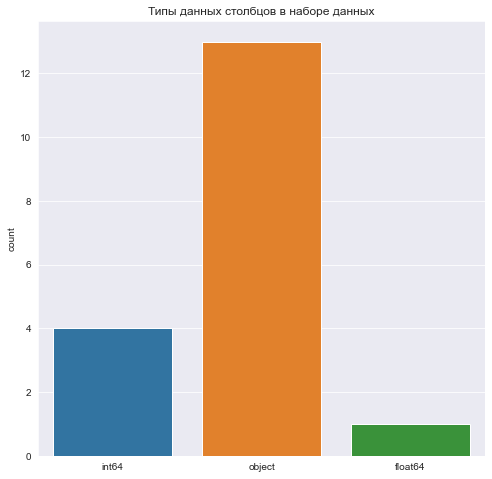

Количество типов данных столбцов
object     13
int64       4
float64     1
dtype: int64


In [5]:
plt.figure(figsize=(8,8))
sns.countplot(data.dtypes)
plt.title("Типы данных столбцов в наборе данных")
plt.show()
print("Количество типов данных столбцов")
print(data.dtypes.value_counts())

Проверка наличия в наборе данных нулевых значений

In [6]:
data.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

Проверка на дубликаты

In [7]:
data.duplicated().sum()

313

In [8]:
data.loc[data.duplicated(),:]

ID  Price  Levy   Manufacturer        Model  Prod. year  \
425    45815372   7840     -  MERCEDES-BENZ        E 200        1998   
1581   45815363   8781     -         TOYOTA          Ist        2002   
1697   45732125  18503     -         TOYOTA        Prius        2010   
1972   45507765  20385     -  MERCEDES-BENZ      CLS 500        2005   
2131   45815363   8781     -         TOYOTA          Ist        2002   
...         ...    ...   ...            ...          ...         ...   
18974  45815465   2352  1273          LEXUS       IS 350        2015   
19137  45810466  15125   642      CHEVROLET      Orlando        2012   
19200  45725908  36065   640  MERCEDES-BENZ  CLA 250 AMG        2013   
19203  45761487  13485   645         TOYOTA        Prius        2011   
19210  45732939   8311   642        HYUNDAI       Sonata        2012   

        Category Leather interior Fuel type Engine volume    Mileage  \
425        Sedan               No       CNG             2  180003 km   
1581   Hatchback               No    Petrol           1.5  117000 km   
1697       Sedan               No    Petrol           1.8  162000 km   
1972       Sedan              Yes    Petrol             5  230000 km   
2131   Hatchback               No    Petrol           1.5  117000 km   
...          ...              ...       ...           ...        ...   
18974      Sedan              Yes    Petrol           3.5   80856 km   
19137       Jeep              Yes    Diesel             2  156834 km   
19200      Sedan              Yes    Petrol     2.0 Turbo   68000 km   
19203      Sedan               No    Hybrid           1.8  281600 km   
19210      Sedan              Yes       LPG             2   36545 km   

       Cylinders Gear box type Drive wheels   Doors             Wheel   Color  \
425          4.0        Manual         Rear  04-May        Left wheel   Black   
1581         4.0     Automatic          4x4  04-May  Right-hand drive     Red   
1697         4.0     Automatic        Front  04-May        Left wheel    Grey   
1972         8.0     Tiptronic         Rear  04-May        Left wheel  Silver   
2131         4.0     Automatic          4x4  04-May  Right-hand drive     Red   
...          ...           ...          ...     ...               ...     ...   
18974        6.0     Automatic          4x4  04-May        Left wheel   Black   
19137        4.0     Automatic        Front  04-May        Left wheel  Golden   
19200        4.0     Tiptronic        Front  04-May        Left wheel     Red   
19203        6.0     Automatic        Front  04-May        Left wheel    Grey   
19210        4.0     Automatic        Front  04-May        Left wheel   White   

       Airbags  
425          4  
1581         4  
1697        12  
1972        10  
2131         4  
...        ...  
18974       12  
19137        4  
19200       12  
19203        8  
19210        4  

[313 rows x 18 columns]

Удаление дубликатов из набора данных

In [9]:
data.drop_duplicates(inplace=True)

In [10]:
print(f'"Этот набор данных содержит" {data.shape[0]} rows & {data.shape[1]} columns.')
data.shape

"Этот набор данных содержит" 18924 rows & 18 columns.


(18924, 18)

### Приводим названия столбцов к нижнему регистру для удобства

In [11]:
data.columns = data.columns.str.lower()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18924 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                18924 non-null  int64  
 1   price             18924 non-null  int64  
 2   levy              18924 non-null  object 
 3   manufacturer      18924 non-null  object 
 4   model             18924 non-null  object 
 5   prod. year        18924 non-null  int64  
 6   category          18924 non-null  object 
 7   leather interior  18924 non-null  object 
 8   fuel type         18924 non-null  object 
 9   engine volume     18924 non-null  object 
 10  mileage           18924 non-null  object 
 11  cylinders         18924 non-null  float64
 12  gear box type     18924 non-null  object 
 13  drive wheels      18924 non-null  object 
 14  doors             18924 non-null  object 
 15  wheel             18924 non-null  object 
 16  color             18924 non-null  object

## Исследование данных

### Столбец levy

In [12]:
data['levy']

0        1399
1        1018
2           -
3         862
4         446
         ... 
19232       -
19233     831
19234     836
19235    1288
19236     753
Name: levy, Length: 18924, dtype: object

Из приведенных выше значений мы видим наличие «-».
Нам нужно заменить «-» на «0».
Затем преобразовать тип данных столбца из «объекта» в «int».

In [13]:
data['levy'] = data['levy'].replace(['-'],['0'])
data['levy'] = data['levy'].astype(str).astype(int)
data['levy']

0        1399
1        1018
2           0
3         862
4         446
         ... 
19232       0
19233     831
19234     836
19235    1288
19236     753
Name: levy, Length: 18924, dtype: int64

### Какие производители более популярны

In [14]:
manufacture = data.manufacturer.value_counts().head(20)
manufacture

HYUNDAI          3729
TOYOTA           3606
MERCEDES-BENZ    2043
FORD             1088
CHEVROLET        1047
BMW              1036
HONDA             960
LEXUS             927
NISSAN            645
VOLKSWAGEN        571
SSANGYONG         439
KIA               417
OPEL              396
MITSUBISHI        288
SUBARU            274
AUDI              254
MAZDA             175
JEEP              138
DAEWOO             91
DODGE              90
Name: manufacturer, dtype: int64

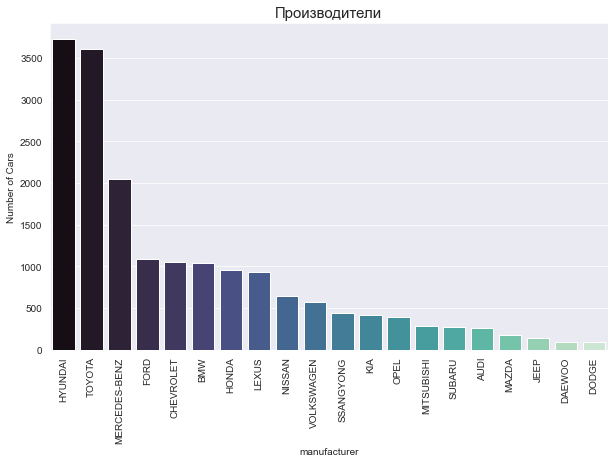

In [15]:
plt.figure(figsize=(10,6))
plt.tight_layout(pad=3)
plt.title("Производители",fontsize=15)
sns.set_style("darkgrid")
a=sns.barplot(manufacture.index,manufacture,palette="mako")
a.set_xticklabels(manufacture.index ,rotation=90)
a.set(xlabel='manufacturer', ylabel='Number of Cars')
plt.show()

Доля Hyundai и Toyota почти одинаковы, они лидеры. Третьим идет Mercedes-Benz

### Какие модели популярны

In [16]:
model=data['model'].value_counts().head(20)
model

Prius         1069
Sonata        1067
Camry          929
Elantra        910
E 350          534
Santa FE       527
FIT            444
H1             435
Tucson         426
X5             351
Aqua           319
Cruze          295
Fusion         295
Optima         230
GX 460         223
Highlander     216
Transit        208
Jetta          201
ML 350         199
Actyon         188
Name: model, dtype: int64

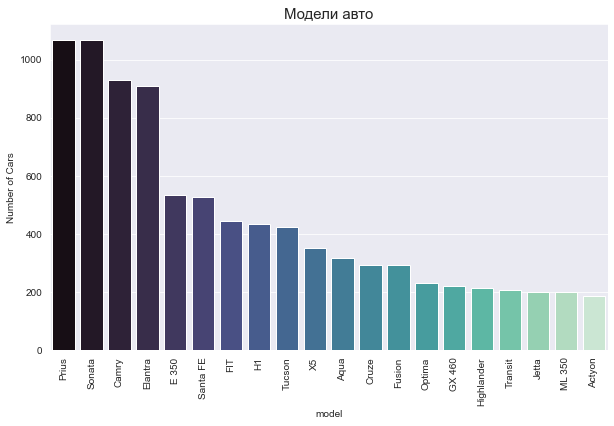

In [17]:
plt.figure(figsize=(10,6))
plt.tight_layout(pad=3)
plt.title("Модели авто",fontsize=15)
sns.set_style("darkgrid")
a=sns.barplot(model.index,model,palette="mako")
a.set_xticklabels(model.index ,rotation=90)
a.set(xlabel='model', ylabel='Number of Cars')
plt.show()

В тройку лидеров входят Prius, Sonata и Camry, но и Elantra не отстает.

### В каком году было произведено большая доля авто

In [18]:
year = data['prod. year'].value_counts().head(20)
year

2012    2131
2014    2090
2013    1913
2011    1582
2015    1527
2010    1463
2016    1449
2017     941
2008     731
2009     595
2018     491
2007     460
2005     396
2003     358
2004     354
2006     315
2019     304
2002     285
2000     277
2001     253
Name: prod. year, dtype: int64

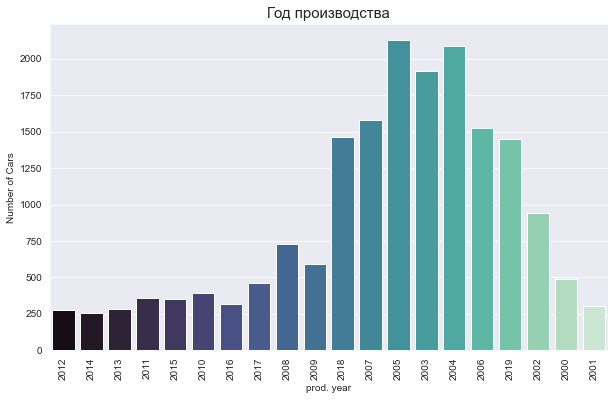

In [19]:
plt.figure(figsize=(10,6))
plt.tight_layout(pad=3)
plt.title("Год производства",fontsize=15)
sns.set_style("darkgrid")
a=sns.barplot(year.index,year,palette="mako")
a.set_xticklabels(year.index ,rotation=90)
a.set(xlabel='prod. year', ylabel='Number of Cars')
plt.show()

Количество вариантов автомобилей каждый год постепенно увеличивается до 2014 года, после чего мы наблюдаем спад. Самое максимальное количество в 2005 году.

### Какие категорие популярные

In [20]:
category = data.category.value_counts()
category

Sedan          8600
Jeep           5378
Hatchback      2799
Minivan         633
Coupe           528
Universal       361
Microbus        299
Goods wagon     229
Pickup           51
Cabriolet        35
Limousine        11
Name: category, dtype: int64

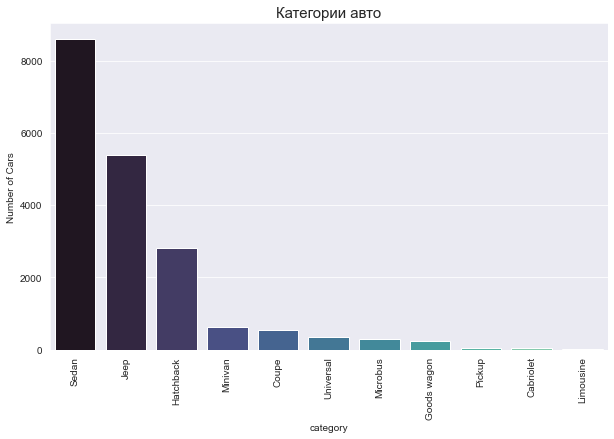

In [21]:
plt.figure(figsize=(10,6))
plt.tight_layout(pad=3)
plt.title("Категории авто",fontsize=15)
sns.set_style("darkgrid")
a=sns.barplot(category.index,category,palette="mako")
a.set_xticklabels(category.index ,rotation=90)
a.set(xlabel='сategory', ylabel='Number of Cars')
plt.show()

Самая популярная категория это Sedan

### Насколько люди любят кожаные салоны?

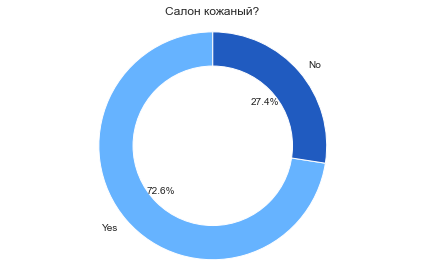

In [22]:
labels = data['leather interior'].unique()
sizes =  data['leather interior'].value_counts()

colors = ['#66b3ff','#205bc0','#94b5ef']
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Салон кожаный?",fontsize=12)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  
plt.tight_layout()
plt.show()

Да, многие любят кожаные салоны

### С каким топливом больше всего авто?

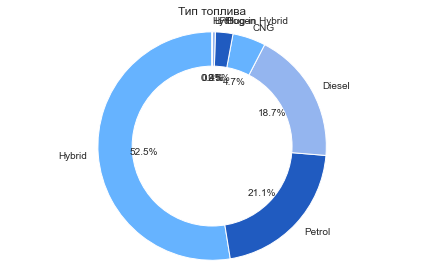

In [23]:
labels = data['fuel type'].unique()
sizes =  data['fuel type'].value_counts()

colors = ['#66b3ff','#205bc0','#94b5ef']
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Тип топлива",fontsize=12)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [24]:
fuel_cnt = data.groupby('fuel type').agg({'fuel type':['count']})
fuel_cnt.columns = ['cnt']
fuel_cnt = fuel_cnt.sort_values(by='cnt', ascending=False).reset_index()
display(fuel_cnt)

fuel type   cnt
0          Petrol  9944
1          Diesel  4001
2          Hybrid  3539
3             LPG   885
4             CNG   469
5  Plug-in Hybrid    85
6        Hydrogen     1

In [25]:
fig = px.bar(fuel_cnt, x='fuel type', y='cnt', title='тип топлива')
fig.update_xaxes(tickangle=15)
fig.show()

Подавляющее количество пользуются бензиновым топливом

### Коробки передач

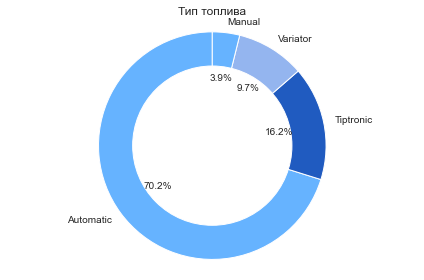

In [26]:
labels = data['gear box type'].unique()
sizes =  data['gear box type'].value_counts()

colors = ['#66b3ff','#205bc0','#94b5ef']
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Тип топлива",fontsize=12)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  
plt.tight_layout()
plt.show()

Больше всего коробок передач на автомате.

### Объем двигателя

In [27]:
data['engine volume']

0              3.5
1                3
2              1.3
3              2.5
4              1.3
           ...    
19232    2.0 Turbo
19233          2.4
19234            2
19235            2
19236          2.4
Name: engine volume, Length: 18924, dtype: object

Наличие слова «Turbo» приводит к тому, что весь столбец объявляется с типом данных «object».
Нужно удалить слово «Turbo», преобразовать тип данных столбца из object в float.

In [28]:
data['engine volume']=data['engine volume'].str.replace('Turbo','')
data['engine volume']= data['engine volume'].astype(str).astype(float)
data['engine volume']

0        3.5
1        3.0
2        1.3
3        2.5
4        1.3
        ... 
19232    2.0
19233    2.4
19234    2.0
19235    2.0
19236    2.4
Name: engine volume, Length: 18924, dtype: float64

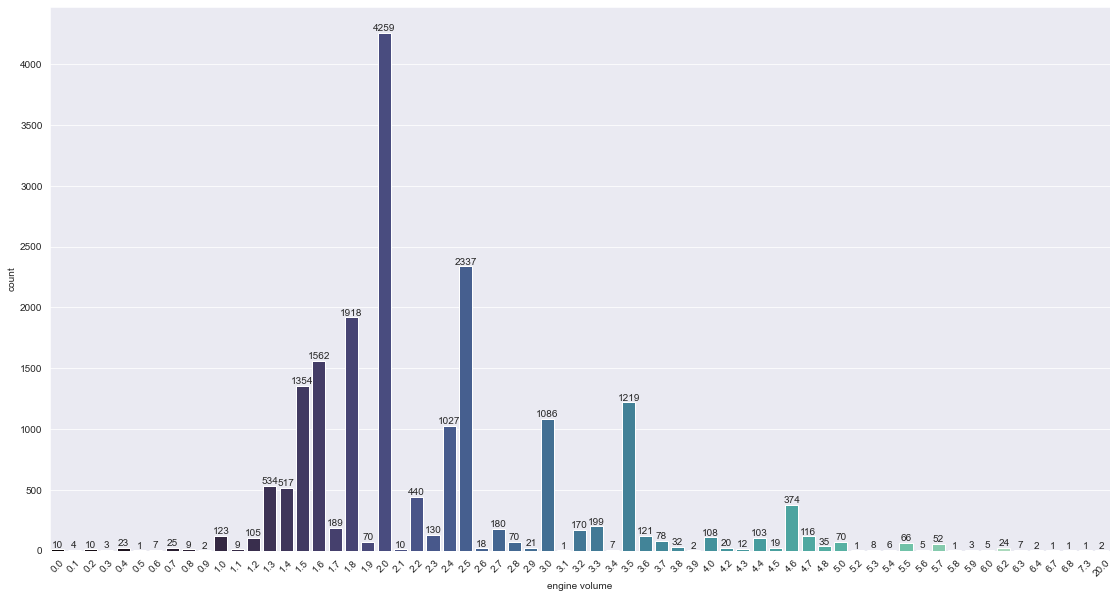

In [29]:
plt.figure(figsize=(19,10))
c1=sns.countplot(x='engine volume',data=data,palette="mako")
plt.xticks(rotation=45)
c1.bar_label(c1.containers[0],size = 10)
plt.show()

Большинство авто имеет объем 2 литра

### Смотрим на пробеги

In [30]:
data['mileage']

0        186005 km
1        192000 km
2        200000 km
3        168966 km
4         91901 km
           ...    
19232    300000 km
19233    161600 km
19234    116365 km
19235     51258 km
19236    186923 km
Name: mileage, Length: 18924, dtype: object

Поскольку столбец пробега состоит из пройденного расстояния со значением, например «...км», этот столбец относится к категории данных типа объекта.
Преобразуйте его в тип данных «int».

In [31]:
data["mileage"] = data["mileage"].str.replace(' km', '')
data["mileage"] = data["mileage"].astype(str).astype(int)

<AxesSubplot:xlabel='mileage', ylabel='Density'>

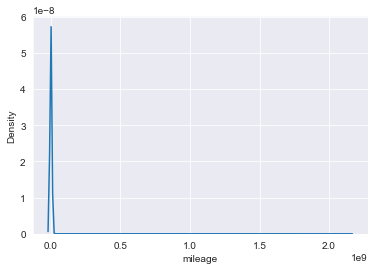

In [32]:
sns.kdeplot(data["mileage"])

In [33]:
data["mileage"] = np.where(data["mileage"] > 0.6e6 , 0.6e6 , data["mileage"])

<AxesSubplot:xlabel='mileage', ylabel='Density'>

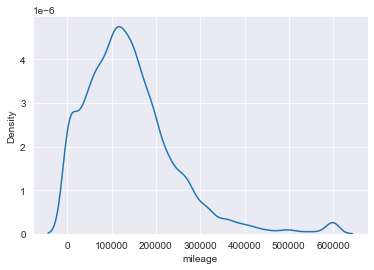

In [34]:
sns.kdeplot(data["mileage"])

In [35]:
Mileage = data.mileage.value_counts().head(20)
Mileage

0.0         714
200000.0    181
150000.0    159
600000.0    157
160000.0    120
180000.0    117
100000.0    105
1000.0      100
170000.0     99
120000.0     98
130000.0     84
111111.0     81
140000.0     73
190000.0     71
300000.0     67
250000.0     67
145000.0     63
80000.0      62
110000.0     61
240000.0     59
Name: mileage, dtype: int64

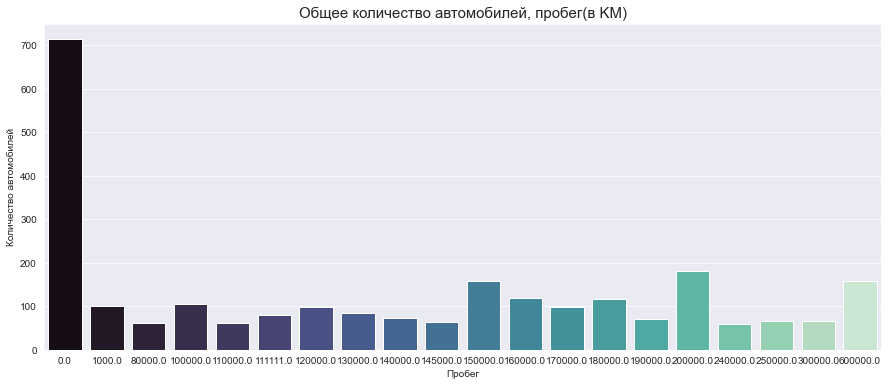

In [36]:
plt.figure(figsize=(15,6))
plt.tight_layout(pad=2)
plt.title('Общее количество автомобилей, пробег(в KM)',fontsize=15)
sns.set_style("darkgrid")
c1=sns.barplot(Mileage.index,Mileage,palette="mako")
c1.set(xlabel='Пробег', ylabel='Количество автомобилей')
plt.show()

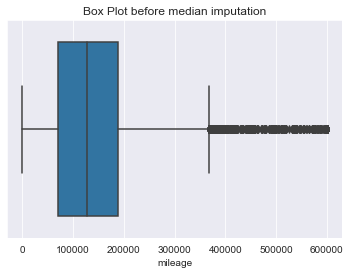

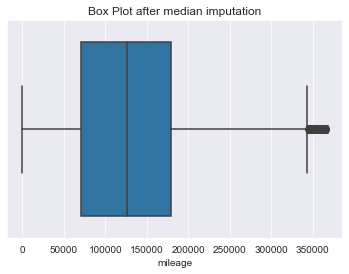

In [37]:
sns.boxplot(data['mileage'])
plt.title("Box Plot before median imputation")
plt.show()
q1 = data['mileage'].quantile(0.25)
q3 = data['mileage'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(data['mileage'])
for i in data['mileage']:
    if i > Upper_tail or i < Lower_tail:
            data['mileage'] = data['mileage'].replace(i, med)
sns.boxplot(data['mileage'])
plt.title("Box Plot after median imputation")
plt.show() 

Медиана пробега примерно 140 тыс.км

### Цилиндры

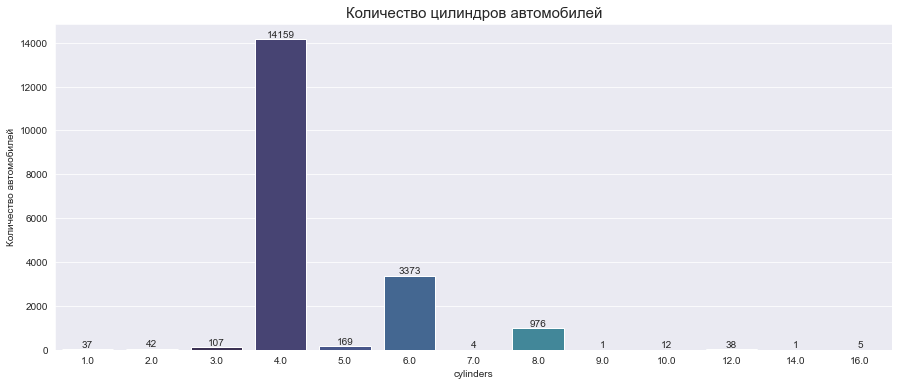

In [38]:
plt.figure(figsize=(15,6))
plt.tight_layout(pad=2)
plt.title('Количество цилиндров автомобилей',fontsize=15)
sns.set_style("darkgrid")
c1=sns.countplot(x='cylinders',data=data,palette="mako")
c1.set(xlabel='cylinders', ylabel='Количество автомобилей')
c1.bar_label(c1.containers[0],size = 10)
plt.show()

Подавляющее большинство это четырех цилиндровые двигатели

### Тип привода

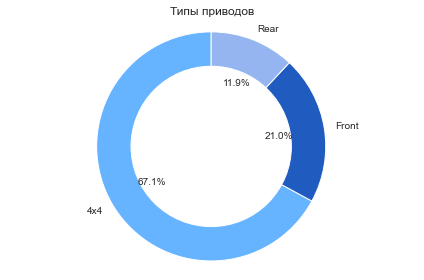

In [39]:
labels = data['drive wheels'].unique()
sizes =  data['drive wheels'].value_counts()

colors = ['#66b3ff','#205bc0','#94b5ef']
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Типы приводов",fontsize=12)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  
plt.tight_layout()
plt.show()

На первом месте передний привод (67.1%) на втором 4х4 (21%) и на третьем задний привод (11.9%)

### Количество дверей

In [40]:
data['doors'].value_counts()

04-May    18032
02-Mar      768
>5          124
Name: doors, dtype: int64

Столбец «doors» в наборе данных требует некоторой очистки.
Вместо количества дверей в машине мы видим даты, которые не имеют отношения к набору данных и конкретному столбцу. Нужно изменить названия.

In [41]:
data['doors'] = data['doors'].str.replace('04-May','4-5')
data['doors'] = data['doors'].str.replace('02-Mar','2-3')
data['doors'].value_counts()

4-5    18032
2-3      768
>5       124
Name: doors, dtype: int64

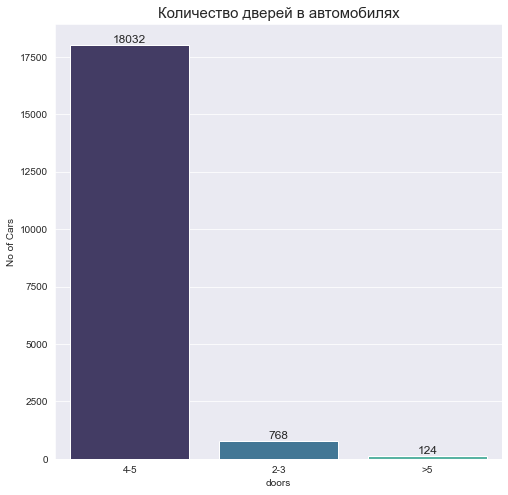

In [42]:
plt.figure(figsize=(8,8))
plt.title("Количество дверей в автомобилях",fontsize=15)
doors = data['doors'].value_counts()
c1=sns.countplot(data['doors'],palette="mako")
c1.set(xlabel='doors',ylabel='No of Cars')
c1.bar_label(c1.containers[0],size = 12)
plt.show()

Почти все авто с 4-5 дверями

### Расположение руля

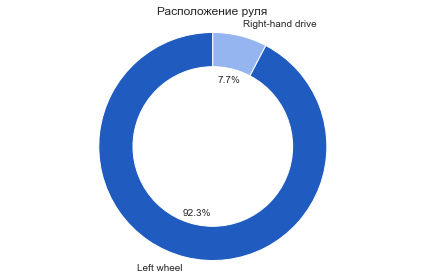

In [43]:
labels = data['wheel'].unique()
sizes =  data['wheel'].value_counts()

colors = ['#205bc0','#94b5ef']
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Расположение руля",fontsize=12)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  
plt.tight_layout()
plt.show()

92.3% у левого руля, а доля правого руля всего 7.7%. В Японии, Великобритании и на Дальнем востоке было бы наоборот.

### Цвета

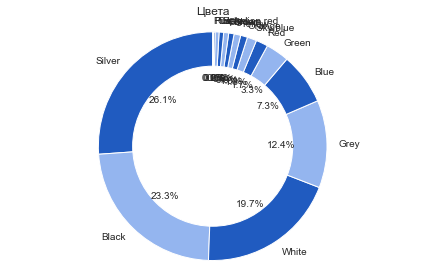

In [44]:
labels = data['color'].unique()
sizes =  data['color'].value_counts()

colors = ['#205bc0','#94b5ef']
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Цвета",fontsize=12)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [45]:
color_cnt = data.groupby('color').agg({'color':['count']})
color_cnt.columns = ['cnt']
color_cnt = color_cnt.sort_values(by='cnt', ascending=False).reset_index()
display(color_cnt)

color   cnt
0           Black  4944
1           White  4407
2          Silver  3729
3            Grey  2343
4            Blue  1376
5             Red   622
6           Green   321
7          Orange   252
8           Brown   185
9   Carnelian red   177
10         Golden   143
11          Beige   134
12       Sky blue   122
13         Yellow   105
14         Purple    39
15           Pink    25

In [46]:
fig = px.bar(color_cnt, x='color', y='cnt', title='Цвета авто')
fig.update_xaxes(tickangle=15)
fig.show()

Самые популярные цвета это черный и белый

### Количество подушек безопасности

In [47]:
airbags_cnt = data.groupby('airbags').agg({'airbags':['count']})
airbags_cnt.columns = ['cnt']
airbags_cnt = airbags_cnt.sort_values(by='cnt', ascending=False).reset_index()
display(airbags_cnt)

airbags   cnt
0         4  5733
1        12  5534
2         0  2384
3         8  1569
4         6  1289
5         2  1051
6        10   845
7         5   104
8        16    93
9         7    85
10        1    76
11        9    62
12        3    37
13       11    33
14       14    20
15       15     7
16       13     2

In [48]:
fig = px.bar(airbags_cnt, x='airbags', y='cnt', title='Количество подушек безопасности')
fig.update_xaxes(tickangle=15)
fig.show()

Абсолютными лидерами по количеству подушек безопасности это 4 и 12 подушек

## Исследуйте двух лидеров производителей Hyundai и Toyota

### Исследуем, какие категории больше всего производят Hyundai и Toyota

In [49]:
man_hyu = data.loc[data['manufacturer'] == 'HYUNDAI'].groupby('category').agg({'manufacturer':['count']})
man_hyu.columns = ['man_hyu']
man_hyu = man_hyu.sort_values(['man_hyu'], ascending=False).reset_index()
display(man_hyu)

category  man_hyu
0        Sedan     2096
1         Jeep      991
2      Minivan      285
3    Universal      143
4        Coupe      102
5    Hatchback      102
6     Microbus        6
7  Goods wagon        2
8       Pickup        2

In [50]:
fig = px.bar(man_hyu,
            x='category', y='man_hyu', width = 900, height=500, color='category')
fig.update_xaxes(tickangle=30)
fig.update_layout(
    title='Hyundai по категориям',
    xaxis_title='Категории',
    yaxis_title='Количество')
fig.update_traces(textposition='outside')
fig.show();

Hyundai больше всего производит седаны

In [51]:
man_toy = data.loc[data['manufacturer'] == 'TOYOTA'].groupby('category').agg({'manufacturer':['count']})
man_toy.columns = ['man_toy']
man_toy = man_toy.sort_values(['man_toy'], ascending=False).reset_index()
display(man_toy)

category  man_toy
0      Sedan     1719
1  Hatchback     1135
2       Jeep      619
3    Minivan       66
4  Universal       30
5      Coupe       20
6     Pickup       15
7   Microbus        2

In [52]:
fig = px.bar(man_toy,
            x='category', y='man_toy', width = 900, height=500, color='category')
fig.update_xaxes(tickangle=30)
fig.update_layout(
    title='Toyota по категориям',
    xaxis_title='Категории',
    yaxis_title='Количество')
fig.update_traces(textposition='outside')
fig.show();

У Toyota так же как и Hyundai больше всего седанов, но и хэтчбэков тоже не мало

### Исследование корреляции набора данных

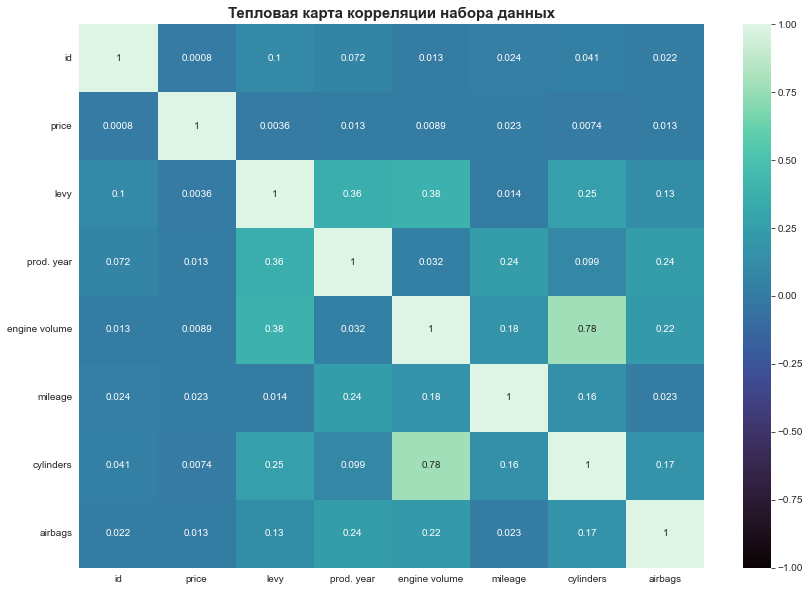

In [53]:
plt.figure(figsize=(14,10))
plot = sns.heatmap(abs(data.corr()), annot=True, cmap='mako',vmin=-1)
plt.title('Тепловая карта корреляции набора данных', weight='bold',fontsize=15)
plot.set_xticklabels(plot.get_xticklabels(), rotation=0, horizontalalignment='center')
plot.set_yticklabels(plot.get_yticklabels(), rotation=0, horizontalalignment='right')
plt.show()

Между переменными нет сильной корреляции

### Анализ средней цены каждой функции

In [54]:
cv = data.dtypes=='object'
lcv = list(cv[cv].index)

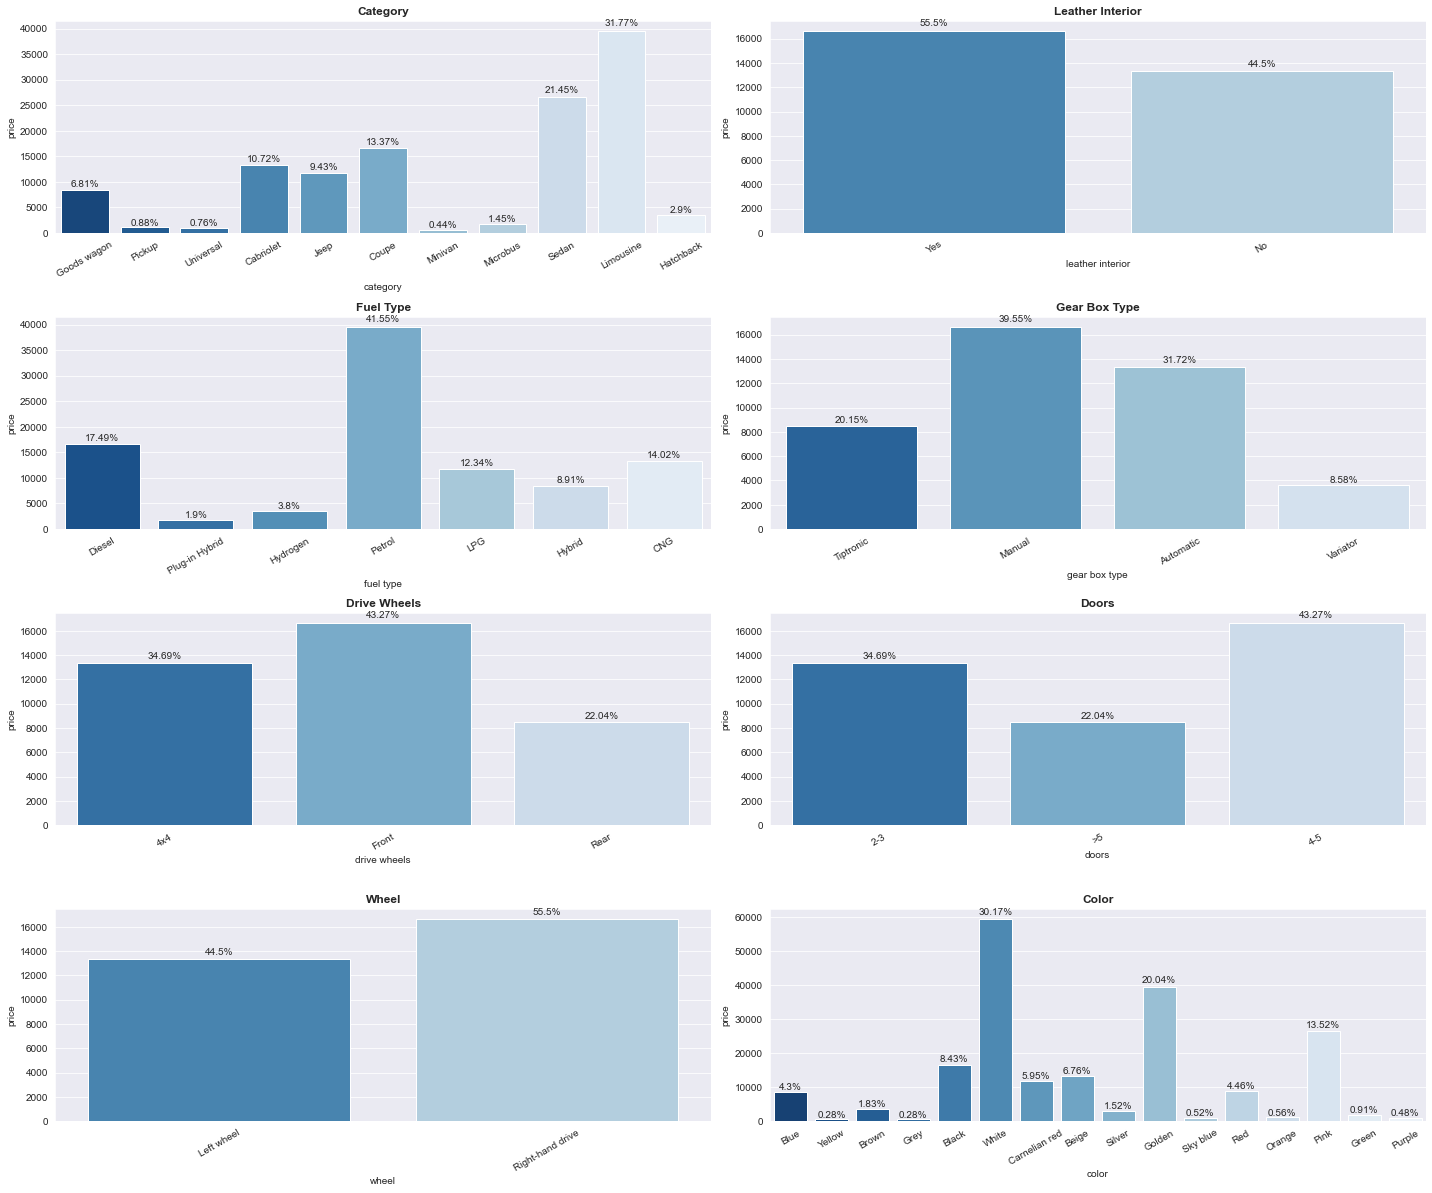

In [55]:
r = int(len(lcv)/2 +1)    

def annot_percent(axes):
    for p in plot.patches:
        total = sum(p.get_height() for p in plot.patches)/100
        percent = round((p.get_height()/total),2)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()*1.015
        plot.annotate(f'{percent}%', (x, y), ha='center', va='bottom')
        
plt.figure(figsize=(20,r*4))
for n,column in enumerate(lcv[2:]):
    df3 = data[['price', column]].groupby(by= [column], as_index=False).agg('mean').sort_values(by='price', ascending=False)
    plot = plt.subplot(r,2,n+1)
    c1=sns.barplot(x =df3[column], y= data['price'],palette="Blues_r")
    plot.set_xticklabels(plot.get_xticklabels(), rotation=30, horizontalalignment='center')
    plt.title(f'{column.title()}',weight='bold')
    plt.tight_layout()
    annot_percent(plot)

Максимальная медианная цена по столбцам:
- у категории мах Лимузины
- у интерьера с кожей
- у топлива бензин
- у типа коробки передач Manual
- у типа привода передний
- у дверей с 4-5 дверями
- у расположении руля с правыми
- в цветах белый

### Средняя цена производства за каждый год

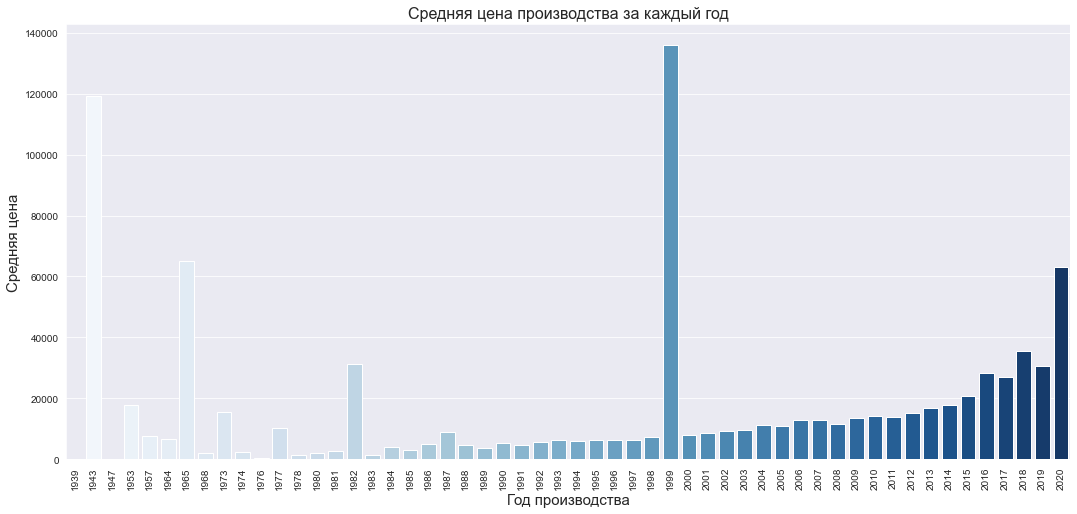

In [57]:
avgprice = data[['price', 'prod. year']].groupby(by= ['prod. year'], as_index=False).agg('mean').sort_values(by='price', ascending=False)
plt.figure(figsize=(18,8))
plot = sns.barplot(x="prod. year", y="price", data=avgprice,palette="Blues")
plot.set_xticklabels(plot.get_xticklabels(), rotation=90, horizontalalignment='center')
plt.title('Средняя цена производства за каждый год', fontsize=16)
plt.xlabel('Год производства', fontsize=15)
plt.ylabel('Средняя цена', fontsize=15)
plt.show()

Из приведенного графика мы можем сделать вывод, что средняя цена автомобиля ежегодно увеличивается. В 1999г. и в 1943г. самые максимальные средние цены на авто.

### Сравнение средней цены за года и индивидуальных особенностей

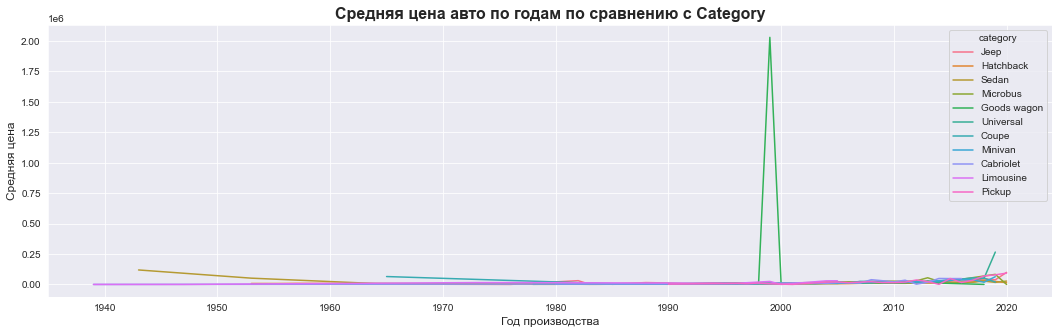

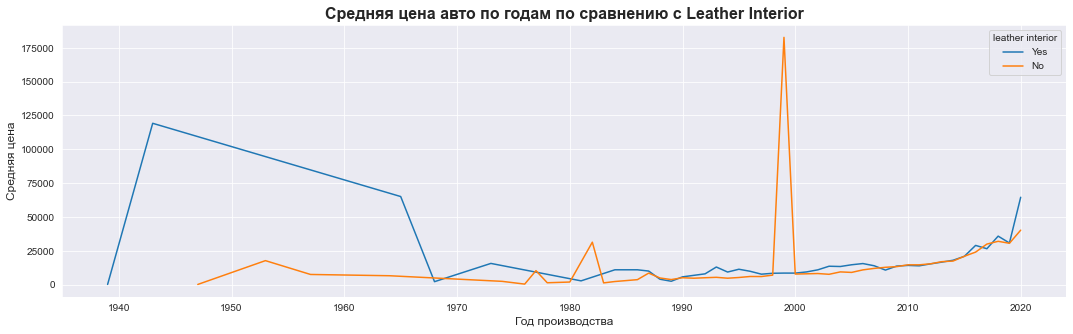

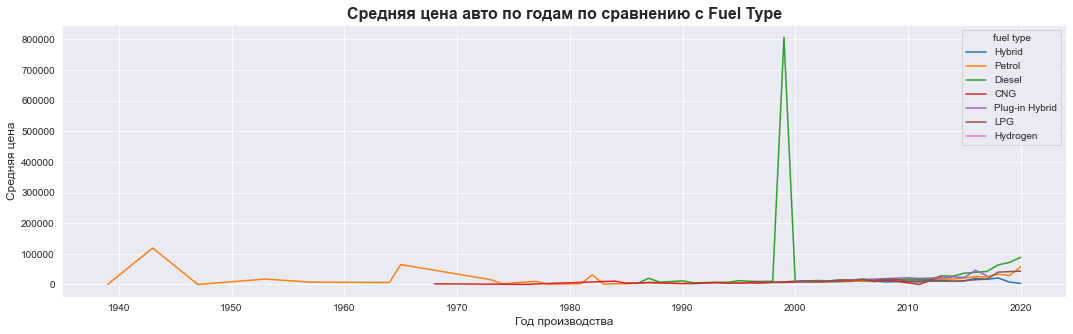

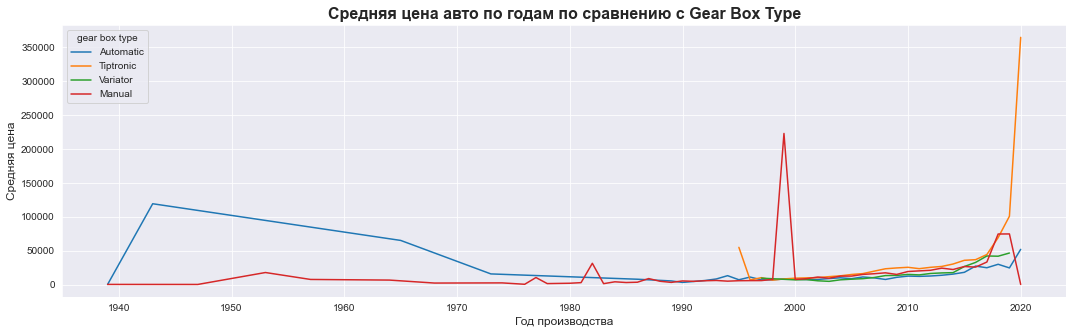

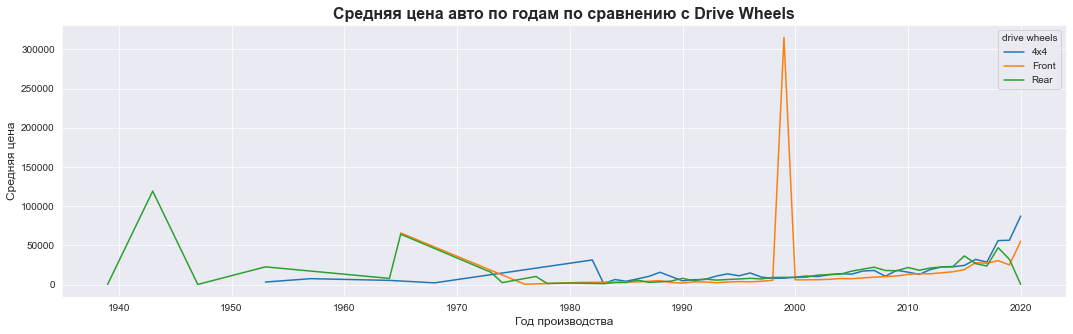

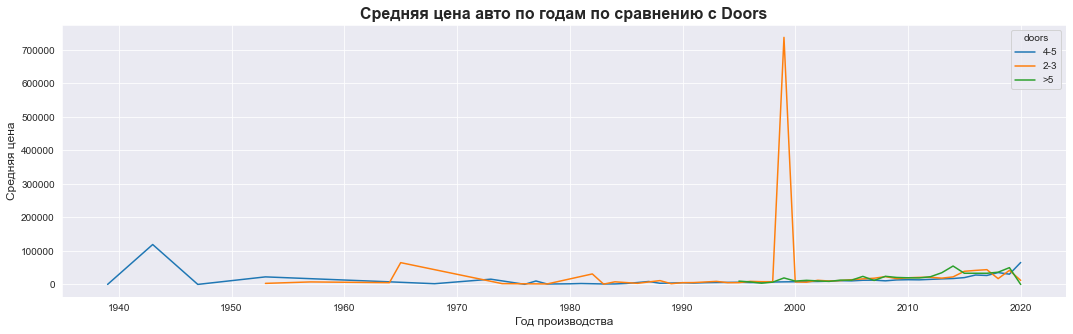

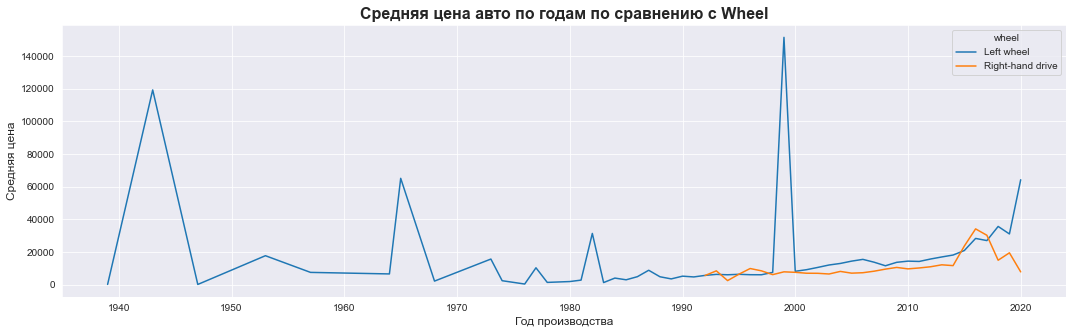

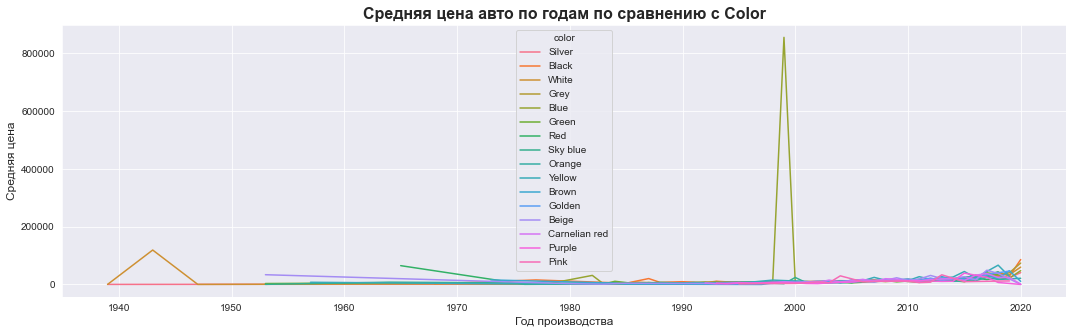

In [59]:
for Hue in lcv[2:]:
    plt.figure(figsize=(18,5))
    plot = sns.lineplot(x = 'prod. year', y = 'price',  data = data, hue = Hue,ci=None)
    plt.title(f'Средняя цена авто по годам по сравнению с {Hue.title()}', fontsize=16,weight='bold')
    plt.xlabel('Год производства', fontsize=12)
    plt.ylabel('Средняя цена', fontsize=12)
    plt.show()

Из приведенных выше графиков мы можем сделать вывод, что:

Средняя цена на двигатели типтроник выросла из-за резкого роста спроса за последние несколько лет.
Средняя цена кожаного салона всегда высока. Но видно что в конце 20 века, средняя-максимальная цена на не кожаные салоны резко поднялась и резко упала.
Также наблюдается рост средней цены на дизельные двигатели в конце 20 века.

## Выводы

**Самые популярные по**: 
- производителям авто это Hyundai и Toyota,
- моделям авто это Prius и Sonata,
- годам производства это 2005 год. 
- категориям седаны и лимузины,
- интерьер кожаный больше всего,
- типу топлива бензиновый (petrol),
- объему двигателя 2 литра,
- цилиндрам 4,
- типу коробки передач Автомат (automatic),
- типу привода 4х4,
- количеству дверей 4-5 дверные,
- расположению руля левый,
- цвету черный и белый,
- количеству подушек безоппасности 4 и 12

**Максимальная медианная цена по столбцам**:
- у категории мах Лимузины
- у интерьера с кожей
- у топлива бензин
- у типа коробки передач Manual
- у типа привода передний
- у дверей с 4-5 дверями
- у расположении руля с правыми
- в цветах белый

В средней цене за года и индивидуальных особенностей, наблюдается тенденция резкого повышения и резкого понижения цен по всем столбцам в конце 90х годов.
